In [171]:
import numpy as np
import pandas as pd
from itertools import *

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from sklearn.preprocessing import StandardScaler

import os

import warnings # 경고메세지 무시
warnings.simplefilter(action='ignore', category=FutureWarning)

In [172]:
# 폴더 생성 함수

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

In [173]:
data = pd.read_csv('titanic.csv')
display(data.head(), data.shape)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

(891, 12)

In [174]:
# NaN 개수 파악 df

def checkNAN(df):

    train_nan = list(df.isna().sum())
    num_nan = list(filter(lambda x:x >= 1, train_nan)) # nan값이 1개 이상인 친구만 보여줌

    index_nan = list(filter(lambda e:train_nan[e] >= 1, range(len(train_nan)))) # 이건 인덱스

    nan_df = pd.DataFrame({'index_in_train' : index_nan, 'column_name' : df.iloc[:, index_nan].columns, 'NAN_number' : num_nan})
    
    return nan_df

In [177]:
# 간단한 결측치 처리 자동화 코드

def handle_NAN(df, list_lists, fill_na, fill_value, back_fill, front_fill):

    fill_val_dict = {}

    for i in range(len(fill_value[1])):
        fill_val_dict[list_lists[fill_value[0]][i]] = fill_value[1][i]
        
    sequence = {fill_na[0] : "df[" + str(list_lists[fill_na[0]]) + "].fillna(" + str(fill_na[1]) + ")", 
                fill_value[0] : "df[" + str(list_lists[fill_value[0]]) + "].fillna(" + str(fill_val_dict) + ")", 
                back_fill : "df[" + str(list_lists[back_fill]) + "].fillna( method='bfill' )",
                front_fill : "df[" + str(list_lists[front_fill]) + "].fillna( method='ffill' )",
                }
    
    del sequence[-1]

    sequence_sort = dict(sorted(sequence.items()))

    for n in range(len(sequence_sort)):
        df[list_lists[n]] = eval(sequence_sort[n])
    return df

In [178]:
# 간단한 결측치 자동 처리기 미리보기

nan_df = checkNAN(data)
display(nan_df)
print('=='*20)


##########################################################################################
# 아래의 숫자는 파라미터입니다. 0부터 코드가 시작되며 결측치가 처리됩니다.
# fill_na의 [0]은 순서, [1]은 채워지는 값입니다.
# fill_value의 [0]은 순서, [1]은 정해주는 컬럼마다 채워지는 값입니다. ex) ['Age'. 'Fare'], [1, 2]이면 // Age는 1, Fare은 2로 채워짐
# col_list에는 리스트 형태로 컬럼명을 넣어주면 됩니다. 주의 : 이중 리스트가 아님!

col_list = [['Embarked'], ['Age', 'Cabin']]
fill_na = [0, 3]
fill_value = [1, [1, 2]]
back_fill = -1
front_fill = -1

##########################################################################################

sequence_view = ["data", col_list, fill_na, fill_value, back_fill, front_fill]
sequence_num = sequence_view[2 : len(sequence_view)]

sequence_dic = pd.DataFrame({'func' : [fill_na[0], fill_value[0], back_fill, front_fill], 
                            'func_list' : ['fill_na', 'fill_value', 'backfill', 'front_fill'], 
                            'parameter' : [fill_na[1], fill_value[1], 'none', 'none']})
sequence_dic = sequence_dic.sort_values('func')


display(sequence_dic)

sequence_dic = sequence_dic[sequence_dic['func'] >= 0]
sequence_dic['columns'] = col_list
print('=='*20)
display(sequence_dic)

index_in_train column_name  NAN_number
0               5         Age         177
1              10       Cabin         687
2              11    Embarked           2

func   func_list parameter
2    -1    backfill      none
3    -1  front_fill      none
0     0     fill_na         3
1     1  fill_value    [1, 2]

func   func_list parameter       columns
0     0     fill_na         3    [Embarked]
1     1  fill_value    [1, 2]  [Age, Cabin]

In [179]:
a = handle_NAN(data, col_list, fill_na, fill_value, back_fill, front_fill)
display(a)
display(checkNAN(data))

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   1.0      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500     2        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250     2        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500     2        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000     2        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500     2        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500     2        Q  

[891 rows x 12 columns]

Empty DataFrame
Columns: [index_in_train, column_name, NAN_number]
Index: []

In [164]:
data2 = data.dropna(axis = 0)
display(checkNAN(data2))

Empty DataFrame
Columns: [index_in_train, column_name, NAN_number]
Index: []

In [ ]:
# 변수들
def check_features(data):

    cat = list(set(list(data.select_dtypes("object").columns) + list(data.select_dtypes("bool").columns) + list(data.select_dtypes("category").columns)))
    num = list(set(list(data.select_dtypes("int").columns) + list(data.select_dtypes("float").columns)))
    # include_word_feats1 = [s for s in data if "변수에 포함된 단어" in s]
    # include_word_feats2 = [s for s in data if "변수에 포함된 단어" in s]
    print(cat)
    print(num)
    
    return cat, num

In [ ]:
# 컬럼 타입 변경

# data.astype({'컬럼명':'float', '컬럼명':'float'}).dtypes

In [ ]:
# 상관계수 히트맵
def make_corr_heatmap(df):
    
    plt.figure(figsize = (8, 8))
    mask = np.zeros_like(df.corr(), dtype=bool) # corr을 다른 것으로 바꾸면 다른 상관계수 그래프를 그릴 수도 있음
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(df.corr(), annot = True, fmt = '.3f', mask = mask, cmap = 'RdYlBu_r',  vmin = -1, vmax = 1)
    plt.show()

In [ ]:
# distplot 자동 생성기

def make_distplots(feature_list):

    dist_feature_list = feature_list

    createFolder('distplot')

    rcm = 1

    while True:
        if len(dist_feature_list) <= rcm ** 2:
            break
        else:
            rcm += 1

    count_index = 1

    for i in dist_feature_list:
        plt.subplot(rcm, rcm, count_index)
        
        sns.distplot(data[i], hist = True, bins = 16)

        plt.title(i)
        plt.tight_layout()
        plt.savefig('distplot\\dist')
            
        count_index += 1
    plt.show()

In [ ]:
# 모든 scatter plot과 histogram plot을 그려주는 명령어, 렉걸릴 수 있으니 조심해서 사용

# sns.pairplot(data, hue = 'Survived')
# plt.show()

In [ ]:
# boxplot 자동 생성기

def make_boxplots(feature_list):

    dist_feature_list = feature_list

    createFolder('boxplot')

    rcm = 1

    while True:
        if len(dist_feature_list) <= rcm ** 2:
            break
        else:
            rcm += 1

    count_index = 1

    for i in dist_feature_list:
        plt.subplot(rcm, rcm, count_index)
        
        sns.boxplot(data = data, x = data[i])

        plt.title(i)
        plt.tight_layout()
        plt.savefig('boxplot\\box')
            
        count_index += 1
    plt.show()

In [ ]:
# p-value df 생성 코드, (p-value는 보통 0.05 이하이면 신뢰성이 있다고 본다, 0.05이하라는건 신뢰도가 95% 이상이라는 것)

def make_pvalue_df(feature_list):
    printList = list(combinations(feature_list, 2))

    name1 = []
    name2 = []
    corr = []
    pval = []

    for i in printList:
        test1 = spst.pearsonr(data[i[0]], data[i[1]])
        name1.append(i[0])
        name2.append(i[1])
        corr.append(format(test1[0], '.6f'))
        pval.append(format(test1[1], '.6f'))
    pval_df = pd.DataFrame({'name1' : name1, 'name2' : name2, 'corr' : corr, 'p-value' : pval})
    pval_df = pval_df.sort_values('p-value')
    return pval_df
        # print(i[0],  "-", i[1], "==> (corr :", format(test1[0], '.5f'), "p-value :", format(test1[1], '.5f') + ')')

['Cabin', 'Name', 'Ticket', 'Sex', 'Embarked']
['SibSp', 'Pclass', 'Survived', 'Age', 'Parch', 'Fare', 'PassengerId']


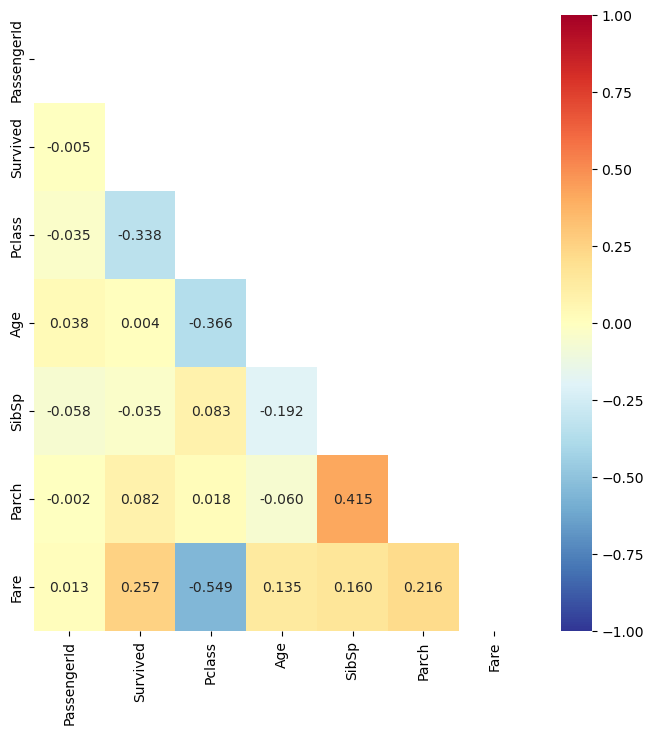

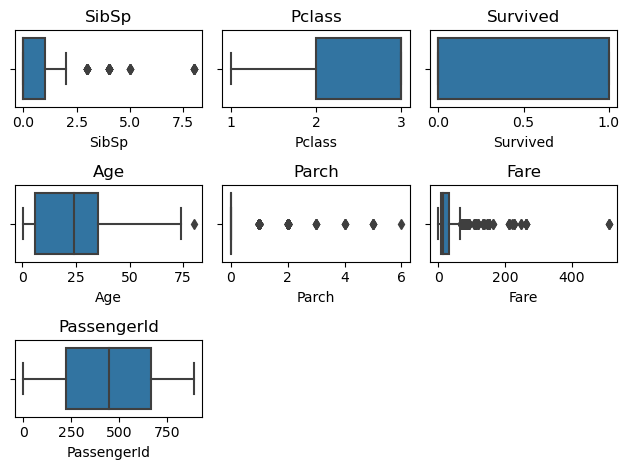

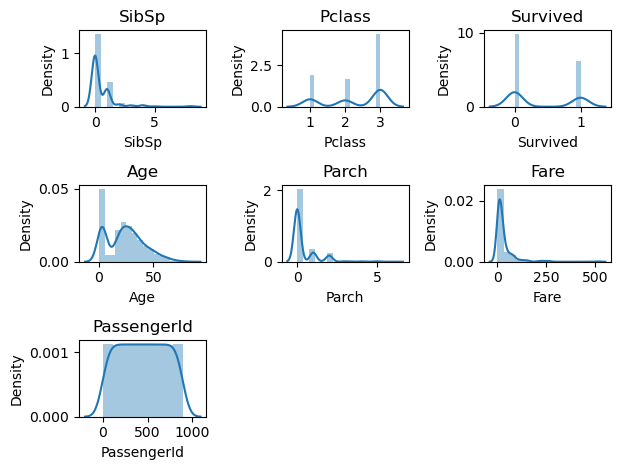

name1        name2       corr   p-value
2      SibSp          Age  -0.191921  0.000000
3      SibSp        Parch   0.414838  0.000000
6     Pclass     Survived  -0.338481  0.000000
7     Pclass          Age  -0.365878  0.000000
18     Parch         Fare   0.216225  0.000000
9     Pclass         Fare  -0.549500  0.000000
13  Survived         Fare   0.257307  0.000000
4      SibSp         Fare   0.159651  0.000002
16       Age         Fare   0.134659  0.000055
0      SibSp       Pclass   0.083081  0.013110
12  Survived        Parch   0.081629  0.014799
15       Age        Parch  -0.059901  0.073920
5      SibSp  PassengerId  -0.057527  0.086132
17       Age  PassengerId   0.038466  0.251382
1      SibSp     Survived  -0.035322  0.292244
10    Pclass  PassengerId  -0.035144  0.294691
8     Pclass        Parch   0.018443  0.582470
20      Fare  PassengerId   0.012658  0.705930
14  Survived  PassengerId  -0.005007  0.881366
11  Survived          Age   0.004463  0.894171
19     Parch  PassengerId  -0.001652  0.960726

In [ ]:
categorial_feats, numerical_feats = check_features(data)
checkNAN(data)
make_corr_heatmap(data)
make_boxplots(numerical_feats)
make_distplots(numerical_feats)
make_pvalue_df(numerical_feats)